This is a notebook for the DS200 course 2025. Containing Plots and analysis for the rainfall dataset.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The Sub-divisional Monthly Rainfall (1901-2017) dataset

The dataset provides timeseries data for the rainfall observed for different regions in India. The timeseries consists of yearly, monthly and seasonal data. Rain in Bangalore is interesting, fun and sometimes annoying. The dataset is provided in the official govt website, and my public repository for the DS200.

Govt : (https://www.data.gov.in/resource/sub-divisional-monthly-rainfall-1901-2017) <br>
Repo : https://github.com/Shiva-sai-krishna/DS200

In [7]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DS200/water.csv")
display(df.head())


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Average Rainfall for the South Indian Regions

Many south indian states have massive rainfalls Therefore, we will try to compare the rainfall observed in these regions through some plots. Lets see the total annual rainfall observed for recent years.

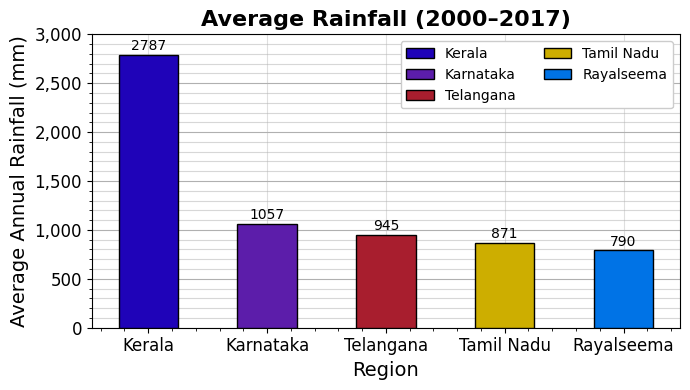

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

regions = ["Telangana", "Tamil Nadu", "Kerala", "Rayalseema", "South Interior Karnataka"]
filtered_df = df[(df["SUBDIVISION"].isin(regions)) & (df["YEAR"].between(2000, 2017))].copy()
filtered_df["SUBDIVISION"] = filtered_df["SUBDIVISION"].replace({"South Interior Karnataka": "Karnataka"})
avg_rainfall = filtered_df.groupby("SUBDIVISION")["ANNUAL"].mean().reset_index()
avg_rainfall = avg_rainfall.sort_values(by="ANNUAL", ascending=False)
x_labels = avg_rainfall["SUBDIVISION"]
y_values = avg_rainfall["ANNUAL"]

fig, ax = plt.subplots(figsize=(7, 4))

bar_colors = ["#1f03b8", "#5c1daa", "#a81e2e", "#cdae00", "#0073e6"]
bars = ax.bar(x_labels, y_values, 0.5 ,color=bar_colors, edgecolor="black", zorder=3)

ax.set_ylabel("Average Annual Rainfall (mm)", fontsize=14)
ax.set_xlabel("Region", fontsize=14)
ax.set_title("Average Rainfall (2000–2017)", fontsize=16, fontweight="bold")

ax.grid(which='major', axis='y', linestyle='-', alpha=1)
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.5)
ax.grid(which='major', axis='x', linestyle='-', alpha=0.4)

ax.minorticks_on()

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_yticks(np.arange(0,3000.01,500), minor=False)
ax.set_yticks(np.arange(0,3000.01,100), minor=True)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
ax.legend(bars, x_labels, loc='upper right', fontsize=10, framealpha=1, ncol=2)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 20, f"{yval:.0f}",
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("rainfall_bar_plot.png", dpi=300)
plt.savefig("rainfall_bar_plot.pdf", format="pdf", dpi=300)
plt.show()


## Analysis
We can observe that Kerala has the highest rainfall among the other sister states in south India. With the average total rainfall to be `2787 mm` and Rayalseema being the least rainfall with the average total rainfall to be `790 mm`

## Rainfall Variation for Karnataka
The Karnataka state holds the city of Bangalore, the rainfall in this state varies with the month. Lets observe this variation through a box plot. 

##

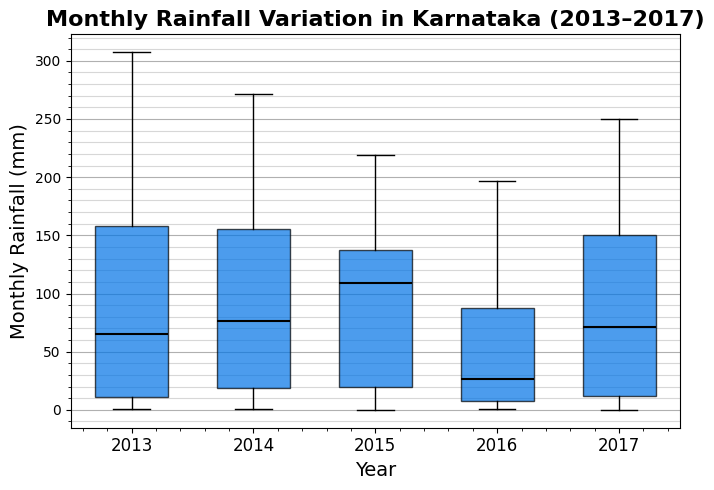

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Filter only Karnataka for 2013–2017
karnataka_df = df[
    (df["SUBDIVISION"].isin(["South Interior Karnataka"])) &
    (df["YEAR"].between(2013, 2017))
].copy()

# Rename region
karnataka_df["SUBDIVISION"] = karnataka_df["SUBDIVISION"].replace({"South Interior Karnataka": "Karnataka"})

# List of month columns in order
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Prepare data for boxplot (each year → 12 monthly values)
box_data = [karnataka_df[karnataka_df["YEAR"] == year][months].values.flatten() for year in range(2013, 2018)]

# Create plot
fig, ax = plt.subplots(figsize=(7, 5))
box = ax.boxplot(box_data, patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor="#0073e6", color="black", alpha=0.7),
                 medianprops=dict(color="black", linewidth=1.5),
                 whiskerprops=dict(color="black"),
                 capprops=dict(color="black"))

# X-axis setup
ax.set_xticklabels([str(year) for year in range(2013, 2018)], fontsize=12)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Monthly Rainfall (mm)", fontsize=14)
ax.set_title("Monthly Rainfall Variation in Karnataka (2013–2017)", fontsize=16, fontweight="bold")

# Add gridlines (both directions)
ax.grid(which='major', axis='y', linestyle='-', alpha=1)
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.5)

ax.minorticks_on()

# Format y-axis numbers nicely
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

plt.tight_layout()
plt.savefig("rainfall_box_plot.png", dpi=300)
plt.savefig("rainfall_box_plot.pdf", format="pdf", dpi=300)
plt.show()


##Analysis
The rainfall observed for the `Karnataka` region varies within an year. For the year `2013 - 2017` different rainfall is observed for different months within that year, with some months having `0 mm` rainfall and with peaks reaching `300 mm` with the average rainfall being around `50 mm`

## Rainfall trend for the Karnataka region

The rainfall in the Karnataka region in the recent years were quite low, with no water, citizens were left with no choice but to fight for water. However, is this an edge case, or is it a steady decline in rainfall. Lets observe it through a scatter plot for the Karnataka regions for the total rainfall observed yearly and for the monsoon region.  

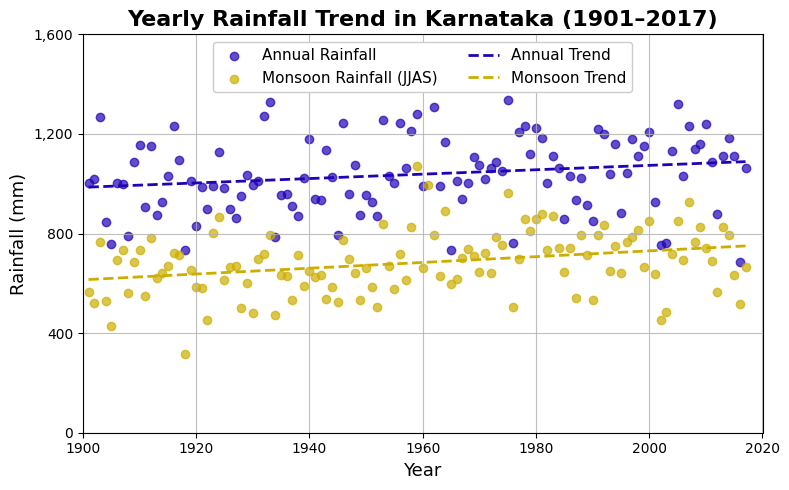

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

karnataka_df = df[df["SUBDIVISION"] == "South Interior Karnataka"].copy()
karnataka_df["SUBDIVISION"] = "Karnataka"
karnataka_df = karnataka_df.sort_values("YEAR")
years = karnataka_df["YEAR"]
annual = karnataka_df["ANNUAL"]
monsoon = karnataka_df["JJAS"]

coeffs_annual = np.polyfit(years, annual, 1)
coeffs_monsoon = np.polyfit(years, monsoon, 1)

# Generate fitted values
trend_annual = np.polyval(coeffs_annual, years)
trend_monsoon = np.polyval(coeffs_monsoon, years)

# Plot the scatter again (same as before)
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(years, annual, color="#1f03b8", label="Annual Rainfall", alpha=0.7)
ax.scatter(years, monsoon, color="#cdae00", label="Monsoon Rainfall (JJAS)", alpha=0.7)

# Add linear trend lines
ax.plot(years, trend_annual, color="#1f03b8", linestyle="--", linewidth=2, label="Annual Trend")
ax.plot(years, trend_monsoon, color="#cdae00", linestyle="--", linewidth=2, label="Monsoon Trend")

ax.set_yticks(np.arange(0,1600.01,400), minor=False)
ax.set_title("Yearly Rainfall Trend in Karnataka (1901–2017)", fontsize=16, fontweight="bold")
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Rainfall (mm)", fontsize=13)
ax.set_xticks(np.arange(1900, 2021, 20))
ax.set_xlim(1900, 2020)
ax.grid(which='major', linestyle='-', alpha=0.8)
ax.minorticks_off()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
ax.legend(fontsize=11, framealpha=1, loc="upper center", ncols = 2)

plt.tight_layout()
plt.savefig("rainfall_scatter_with_trend.png", dpi=300)
plt.savefig("rainfall_scatter_with_trend.pdf", format="pdf", dpi=300)
plt.show()


## Analysis

The total yearly rainfall and the total rainfall during the monsoon season for the Karnataka region has been slightly increasing from the year `1901` to `2017` such that there is an exact correlation between them. 